import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

load dataset

In [ ]:
data = pd.read_csv("iris_csv.csv")
data.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


shape of data

In [ ]:
data.shape

(150, 5)

obtaining the data items depending on the class

In [ ]:
data['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

get the summary of the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


statistical summary of the dataset

In [ ]:
data.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# **Preprocessing**

declaring x and y variables

In [ ]:
x = data.drop("class", axis=1)
y = data["class"]

In [ ]:
x

,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object

KNN

define range of k values tp try

In [ ]:
k_values = list(range(1,21))

define an empty list to store accuracies for each k values

In [ ]:
accuracies = []

split the dataset into training and testing

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train

,sepallength,sepalwidth,petallength,petalwidth
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [ ]:
x_test

,sepallength,sepalwidth,petallength,petalwidth
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4
31,5.4,3.4,1.5,0.4
64,5.6,2.9,3.6,1.3
141,6.9,3.1,5.1,2.3
68,6.2,2.2,4.5,1.5
82,5.8,2.7,3.9,1.2


iterate through each k values

In [ ]:
for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_test, y_test)
  accuracy = knn.score(x_test, y_test)
  accuracies.append(accuracy)

plot te elbow curve

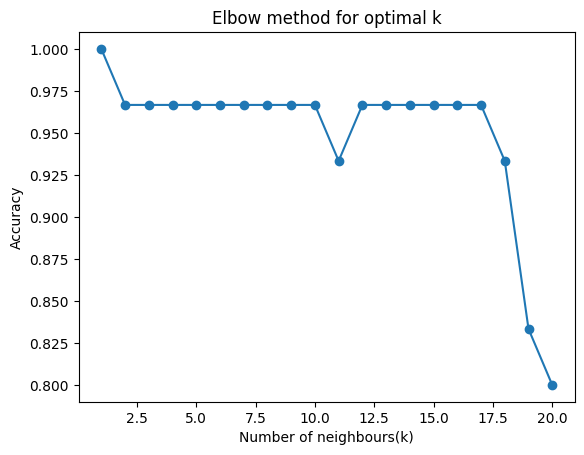

In [ ]:
plt.plot(k_values, accuracies, marker='o')
plt.title('Elbow method for optimal k')
plt.xlabel('Number of neighbours(k)')
plt.ylabel('Accuracy')
plt.show()

find the optimal k values

In [ ]:
optimal_k = k_values[np.argmax(accuracies)]
print("Optimal k: ", optimal_k)

Optimal k:  1


create the KNN ML model

In [ ]:
model = KNeighborsClassifier(n_neighbors=1)

train the model

In [ ]:
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

got the prediction

In [ ]:
pred = model.predict(x_test)
pred[0:5]

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor'], dtype=object)

In [ ]:
y_test[0:5]

73     Iris-versicolor
18         Iris-setosa
118     Iris-virginica
78     Iris-versicolor
76     Iris-versicolor
Name: class, dtype: object

Calculate the accuracy of the created model

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred)

confusion metrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)